<a href="https://colab.research.google.com/github/smurillo1/RegressaoLinearDNC/blob/main/DesafioRegress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio de Regressão Linear Simples

**Autor: Sávio Murillo Dias Bastos**

In [ ]:
#tratamento dos dados
import pandas as pd

#visualização
import matplotlib.pyplot as plt
import seaborn as sns
#treinamento do modelo
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 1) Análise Exploratória

In [ ]:
df = pd.read_csv('/content/MKT.csv')

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.duplicated().sum()

0

De cara, é possível identificar que não existem nulos e duplicados no dataset.


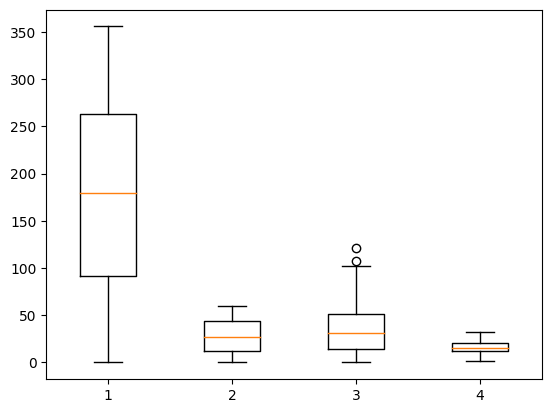

In [ ]:
figure = figsize=(8,4)
plt.boxplot(df);

In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Como identificado no boxplot acima, os outliers estão presentes no grupo 3, no entanto não considero que estejam sendo tão inffluentes a ponto de ser realizada uma limpeza.


# 2) Análise Exploratória

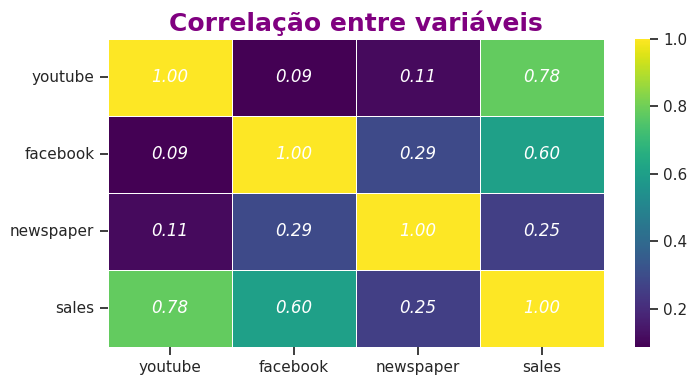

In [ ]:
#Estabelecendo correlação entre variáveis contínuas
annot_kws={'fontsize':12, 
           'fontstyle':'italic',  
           'color':"w",
           'alpha':1,
           'horizontalalignment':'center'}

sns.set(rc={'figure.figsize':(8,4), 'figure.facecolor':'white'})
sns.set_style("ticks")
plt.title('Correlação entre variáveis', fontsize=18, fontweight='bold',color='purple');

#utlizando variaveis contínuas para realizar a correlação de Pearson (r)
sns.heatmap(df.corr(),annot=True, annot_kws = annot_kws, fmt='.2f', linewidth=.5, cmap='viridis');

A partir do heatmap acima, podemos ver que o Youtube é o canal mais correlacionado com o campo de vendas ('sales'), sendo seguido pelo facebook. No entanto, o canal 'newspaper' parece ser o menos produtivo entre os utilizados.

Sendo assim, podemos pensar que, quanto mais os investimentos estiverem concentrados no youtube e no facebook, maior será o número de vendas.




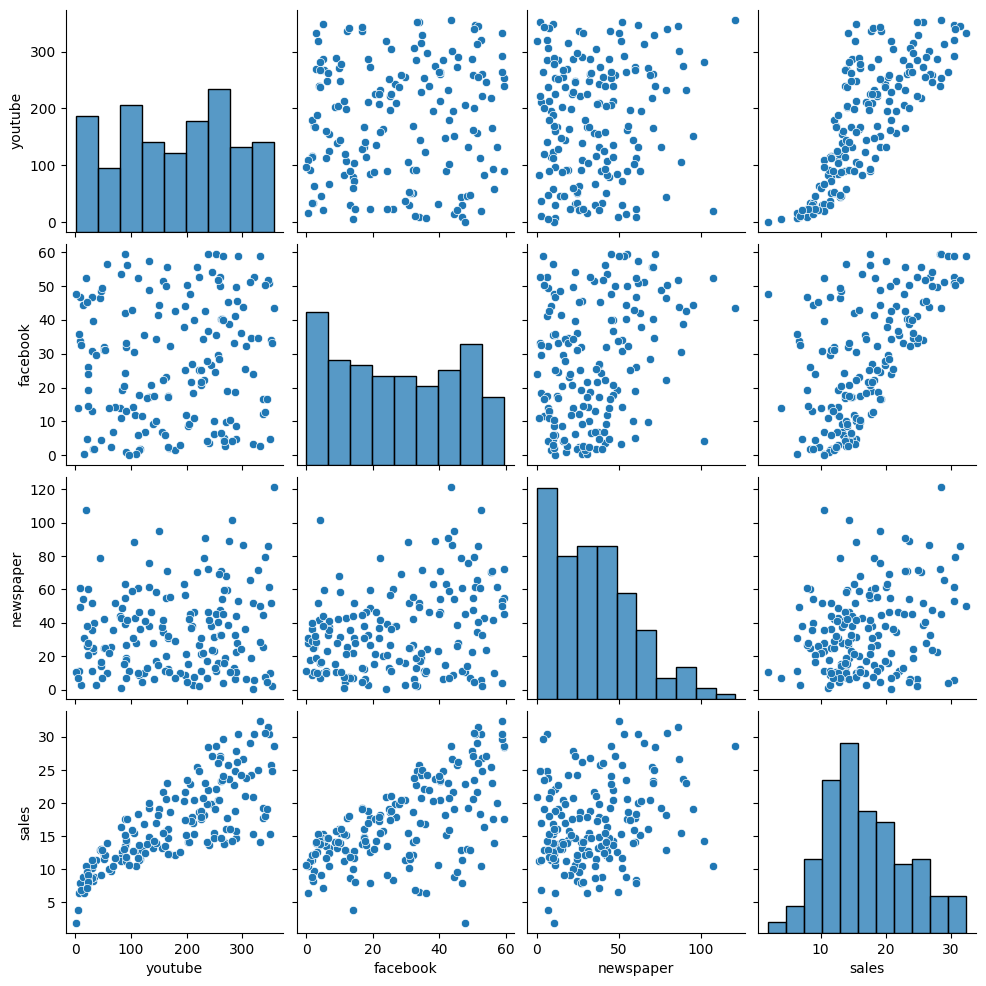

In [ ]:
sns.pairplot(df)

O youtube apresenta alguns picos de investimento, sendo abaixo de 50, acima de 100 e acima de 200.


O facebook apresenta um grande investimento em valores abaixo de 10 reais, a partir disso o investimento cai um pouco nas outras faixas, mantendo-se quase que constante.

O Newspaper apresenta um investimento até a faixa dos 50, após isso entra em queda livre.

Aqui podemos observar que as vendas do produto em questão, se concentram em valores entre 10 e 20.

<Axes: xlabel='sales', ylabel='Count'>

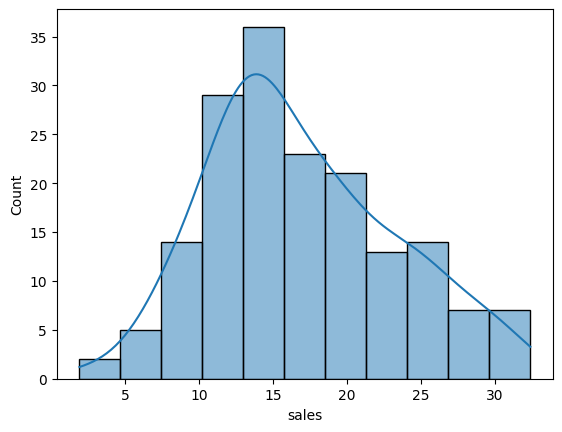

In [ ]:
sns.histplot(df['sales'], kde=True)

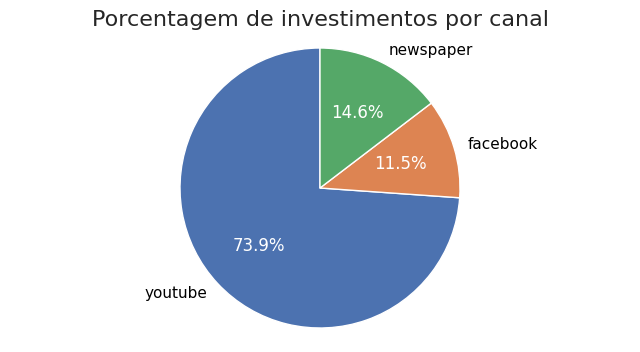

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular a soma de cada coluna
soma_colunas = df[['youtube','facebook','newspaper']].sum()

# Plotar o gráfico de pizza
grafico_pizza = plt.pie(soma_colunas, labels=soma_colunas.index, autopct='%1.1f%%', startangle=90, textprops={'color': 'black'})

# Mudar a cor dos valores
for texto in grafico_pizza[2]:
    texto.set_color('white')

# Adicionar título
plt.title('Porcentagem de investimentos por canal', fontsize=16)

# Aspecto de um círculo
plt.axis('equal')

# Exibir o gráfico
plt.show()

A partir do gráfico acima, pode-se observar que o youtube acumula o maior montante de investimento. Vamos investigar se este investimento está sendo revertido também em valores de venda.



# 3) Modelagem

## Definindo variáveis



*   X = Explicativas
*   Y = Target




In [ ]:
X = df[['youtube',	'facebook',	'newspaper']]
Y = df['sales']

## Aplicando "train_test_split"

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(119, 3)
(119,)
(52, 3)
(52,)


## Treinando modelo

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, Y_train)

LinearRegression()

## Predict

In [ ]:
Y_pred = lm.predict(X_test)

In [ ]:
r = r2_score(Y_test, Y_pred)

In [ ]:
print('r quadrado:', r)

r quadrado: 0.882423505618885


Text(0, 0.5, 'Sales')

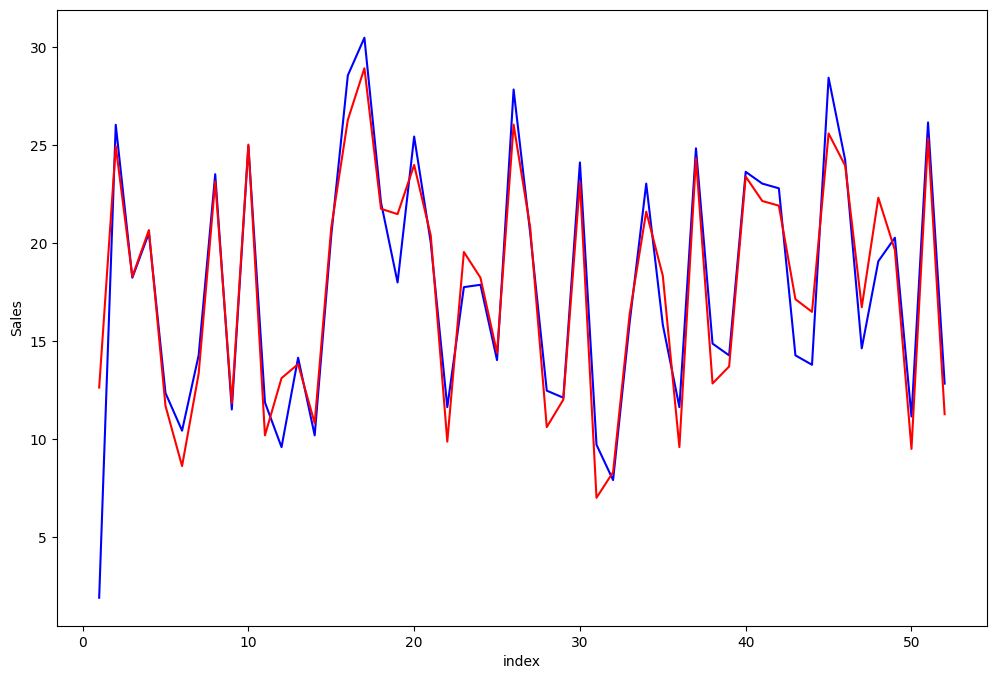

In [ ]:
c = [i for i in range(1, 53, 1)]
fig = plt.figure(figsize=(12,8))
plt.plot(c,Y_test, color='blue')
plt.plot(c, Y_pred, color='red')
plt.xlabel('index')
plt.ylabel('Sales')

Conseguimos avaliar que a predição possui alguns desvios, porém, o predito consegue obter um resultado bem próximo do real.